<a href="https://colab.research.google.com/github/Trongnhat191/Yeast-Cell-Detection/blob/main/Get_labeled_Yeast_Cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CUT AND PADDING


In [ ]:
cd /content/drive/MyDrive/Yeast_Nhat

/content/drive/MyDrive/Yeast_Nhat


In [ ]:
ls

drive/  sample_data/


In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
labeled_image_folder = 'Tu_Lieu_AI'
unlabeled_image_folder = 'Tu_Lieu_AI_Goc'
unlabeled_cut_outside_image_folder = 'Tu_Lieu_AI_Goc_Cut_Outside'
labeled_cut_outside_image_folder = 'Tu_Lieu_AI_Cut_Outside'

labeled_image_list = sorted(os.listdir(labeled_image_folder))
unlabeled_image_list = sorted(os.listdir(unlabeled_image_folder))
unlabeled_cut_outside_list = sorted(os.listdir(unlabeled_cut_outside_image_folder))
labeled_cut_outside_list = sorted(os.listdir(labeled_cut_outside_image_folder))


print(len(unlabeled_cut_outside_list))

50


In [ ]:
print(len(labeled_image_list))
print(len(unlabeled_image_list))

50
50


In [ ]:
labeled_image_1 = cv2.imread(os.path.join(labeled_image_folder, labeled_image_list[0]))
unlabeled_image_1 = cv2.imread(os.path.join(unlabeled_image_folder, unlabeled_image_list[0]))



In [ ]:
#Cut and padding image

def cut_unecessary_img(head_path,input_paths,save_paths):
  for i in range(len(input_paths)):
    image = cv2.imread(os.path.join(head_path, input_paths[i]))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    threshold_value = 185
    ret, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

    thresholded_image = cv2.bitwise_not(thresholded_image)

    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    mask = np.zeros_like(gray_image)

    new_contours = ()

    MIN_HEIGHT = image.shape[1] * 0.5
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if h >= MIN_HEIGHT:
            new_contours += (cnt,)
    con = new_contours[0]
    cv2.drawContours(mask, [con], -1, (255), thickness=cv2.FILLED)
    x ,y,w,h = cv2.boundingRect(con)
    # # Apply the mask to the original image
    result = cv2.bitwise_and(image, image, mask=mask)
    # cv2_imshow(result)
    result = result[y:y+1536,x:x+1536]
    # cv2_imshow(result)
    # plt.show()
    # Display the result
    # print(result.shape)
    result = pad_image(result, (1536,1536))
    cv2_imshow(result)
    print(result.shape)
    save_path = os.path.join(save_paths,input_paths[i])
    # cv2.imwrite(save_path, result)


In [ ]:
# def pad_image(image, target_size):
#     # image = cv2.imread(img_path)
#     H, W = image.shape[:2]
#     target_H, target_W = target_size

#     pad_height = max(0, target_H - H)
#     pad_width = max(0, target_W - W)

#     padded_image = np.pad(image, ((0, pad_height), (0, pad_width), (0, 0)), mode='constant')

#     padded_image = padded_image[:target_H, :target_W, :]
#     return padded_image
#     # print(padded_image.shape)
#     # cv2.imwrite(img_path, padded_image)


In [1]:
cut_unecessary_img(labeled_image_folder,labeled_image_list,labeled_cut_outside_image_folder)

In [2]:
cut_unecessary_img(unlabeled_image_folder,unlabeled_image_list,unlabeled_cut_outside_image_folder)

#CROP LABELED YEAST


In [ ]:
def is_ellipse(contour, aspect_ratio_threshold=0.2):
    if len(contour) >= 5:  # fitEllipse requires at least 5 points
        ellipse = cv2.fitEllipse(contour)
        (x, y), (MA, ma), angle = ellipse

        # Calculate the aspect ratio of the major and minor axes
        aspect_ratio = ma / MA

        # Check if the aspect ratio is within the threshold
        if 1 - aspect_ratio_threshold < aspect_ratio < 1 + aspect_ratio_threshold:
            return True
    return False

In [ ]:
#check color

def has_red_color(image, lower_red1=(0, 120, 70), upper_red1=(10, 255, 255), lower_red2=(170, 120, 70), upper_red2=(180, 255, 255)):
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create masks for the red color ranges
    mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)

    # Combine the masks
    red_mask = mask1 | mask2

    # Check if there are any red pixels in the image
    if np.any(red_mask):
        return True
    return False

def has_green_color(image, lower_green=(35, 50, 50), upper_green=(85, 255, 255)):
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask for the green color range
    green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

    # Check if there are any green pixels in the image
    if np.any(green_mask):
        return True
    return False

def has_purple_color(image):
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range for purple color in HSV
    lower_purple = np.array([125, 50, 50])
    upper_purple = np.array([155, 255, 255])

    # Create a mask for purple color
    purple_mask = cv2.inRange(hsv_image, lower_purple, upper_purple)

    # Check if there are any purple pixels in the mask
    if np.any(purple_mask):
        return True
    else:
        return False
def has_blue_color(image):
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range for blue color in HSV
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([140, 255, 255])

    # Create a mask for blue color
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

    # Check if there are any blue pixels in the mask
    if np.any(blue_mask):
        return True
    else:
        return False
color_check_path = 'color_check'

In [ ]:
print(unlabeled_cut_outside_list)
print(labeled_cut_outside_list)

['D1_B1_0H_02.jpeg', 'D1_B1_0H_12.jpeg', 'D1_B1_10H_11.jpeg', 'D1_B1_12H_02.jpeg', 'D1_B1_12H_04.jpeg', 'D1_B1_12H_11.jpeg', 'D1_B1_20H_01.jpeg', 'D1_B1_20H_06.jpeg', 'D1_B1_20H_08.jpeg', 'D1_B1_2H_01.jpeg', 'D1_B1_2H_04.jpeg', 'D1_B1_2H_06.jpeg', 'D1_B1_4H_03.jpeg', 'D1_B1_4H_05.jpeg', 'D1_B1_4H_08.jpeg', 'D1_B1_6H_02.jpeg', 'D1_B1_6H_11.jpeg', 'D1_B1_8H_06.jpeg', 'D1_B1_8H_08.jpeg', 'D1_B1_8H_12.jpeg', 'E1_B1_0H_02.jpeg', 'E1_B1_0H_05.jpeg', 'E1_B1_0H_11.jpeg', 'E1_B2_2H_02.jpeg', 'E1_B2_2H_09.jpeg', 'E1_B2_4H_02.jpeg', 'E1_B2_4H_04.jpeg', 'E1_B2_4H_09.jpeg', 'E1_B2_6H_03.jpeg', 'E1_B2_6H_06.jpeg', 'E1_B2_6H_10.jpeg', 'F1_B2_0H_08.jpeg', 'F1_B2_0H_11.jpeg', 'F1_B2_0H_12.jpeg', 'F1_B2_10H_03.jpeg', 'F1_B2_10H_06.jpeg', 'F1_B2_10H_08.jpeg', 'F1_B2_20H_07.jpeg', 'F1_B2_20H_09.jpeg', 'F1_B2_20H_12.jpeg', 'F1_B2_24H_03.jpeg', 'F1_B2_24H_04.jpeg', 'F1_B2_24H_05.jpeg', 'F1_B2_2H_02.jpeg', 'F1_B2_2H_09.jpeg', 'F1_B2_4H_02.jpeg', 'F1_B2_4H_06.jpeg', 'F1_B2_4H_12.jpeg', 'F1_B2_6H_01.jpeg', 'F1

In [ ]:
for i in range(len(labeled_cut_outside_list)):
    print(labeled_cut_outside_list[i])
    unlabeled_img_test = cv2.imread(os.path.join(unlabeled_cut_outside_image_folder,unlabeled_cut_outside_list[i]))
    img_test = cv2.imread(os.path.join(labeled_cut_outside_image_folder,labeled_cut_outside_list[i]))

    gray_image = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)

    thresh_hold = 155
    ret, thresholded_image = cv2.threshold(gray_image, thresh_hold, 255, cv2.THRESH_BINARY)

    # thresholded_image = cv2.bitwise_not(thresholded_image)

    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    MAX_HEIGHT = img_test.shape[0] * 0.5
    MIN_HEIGHT = img_test.shape[0] /150
    dem =0
    mark = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if h < MAX_HEIGHT and h > MIN_HEIGHT:
          if (x+w//2, y+h//2) not in mark and is_ellipse(cnt, 0.5):
            # print(f"x={x+w//2} ----- y= { y+ h//2}")

            mark.append((x+w//2, y+h//2))
            mark.append((x+w//2+1, y+h//2))
            mark.append((x+w//2+1, y+h//2+1))
            mark.append((x+w//2-1, y+h//2-1))
            mark.append((x+w//2, y+h//2+1))
            mark.append((x+w//2, y+h//2-1))
            mark.append((x+w//2-1, y+h//2))
            dem +=1

            crop_image = img_test[y:y+h, x:x+w]
            crop_unlabeled_image = unlabeled_img_test[y:y+h, x:x+w]

            if has_red_color(crop_image):
              classified_folder= "normal"
            elif has_green_color(crop_image):
              classified_folder= "normal_2x"
            elif has_purple_color(crop_image):
              classified_folder= "abnormal"
            elif has_blue_color(crop_image):
              classified_folder= "abnormal_2x"

            classified_path = "Classify_Labeled_Data/"+classified_folder+"/"+unlabeled_cut_outside_list[i].split('.')[0]+"="+str(dem)+".jpeg"
            cv2.imwrite(classified_path, crop_unlabeled_image)


D1_B1_0H_02.jpeg
D1_B1_0H_12.jpeg
D1_B1_10H_11.jpeg
D1_B1_12H_02.jpeg
D1_B1_12H_04.jpeg
D1_B1_12H_11.jpeg
D1_B1_20H_01.jpeg
D1_B1_20H_06.jpeg
D1_B1_20H_08.jpeg
D1_B1_2H_01.jpeg
D1_B1_2H_04.jpeg
D1_B1_2H_06.jpeg
D1_B1_4H_03.jpeg
D1_B1_4H_05.jpeg
D1_B1_4H_08.jpeg
D1_B1_6H_02.jpeg
D1_B1_6H_11.jpeg
D1_B1_8H_06.jpeg
D1_B1_8H_08.jpeg
D1_B1_8H_12.jpeg
E1_B1_0H_02.jpeg
E1_B1_0H_05.jpeg
E1_B1_0H_11.jpeg
E1_B2_2H_02.jpeg
E1_B2_2H_09.jpeg
E1_B2_2H_11.jpeg
E1_B2_4H_02.jpeg
E1_B2_4H_04.jpeg
E1_B2_4H_09.jpeg
E1_B2_6H_03.jpeg
E1_B2_6H_06.jpeg
E1_B2_6H_10.jpeg
F1_B2_0H_08.jpeg
F1_B2_0H_11.jpeg
F1_B2_0H_12.jpeg
F1_B2_10H_03.jpeg
F1_B2_10H_06.jpeg
F1_B2_10H_08.jpeg
F1_B2_20H_07.jpeg
F1_B2_20H_09.jpeg
F1_B2_20H_12.jpeg
F1_B2_24H_03.jpeg
F1_B2_24H_04.jpeg
F1_B2_24H_05.jpeg
F1_B2_2H_02.jpeg
F1_B2_2H_09.jpeg
F1_B2_4H_02.jpeg
F1_B2_4H_06.jpeg
F1_B2_4H_12.jpeg
F1_B2_6H_01.jpeg
F1_B2_6H_04.jpeg


In [ ]:
print(len(os.listdir("Classify_Labeled_Data/abnormal")))
print(len(os.listdir("Classify_Labeled_Data/abnormal_2x")))
print(len(os.listdir("Classify_Labeled_Data/normal")))
print(len(os.listdir("Classify_Labeled_Data/normal_2x")))

645
93
180
19


Test


In [ ]:
ls

Back_test/              Tu_Lieu_AI/              Tu_Lieu_AI_Goc/              Untitled0.ipynb
Classify_Labeled_Data/  Tu_Lieu_AI_Cut_Outside/  Tu_Lieu_AI_Goc_Cut_Outside/


In [ ]:
img = cv2.imread('Tu_Lieu_AI_Cut_Outside/E1_B2_2H_11.jpeg')

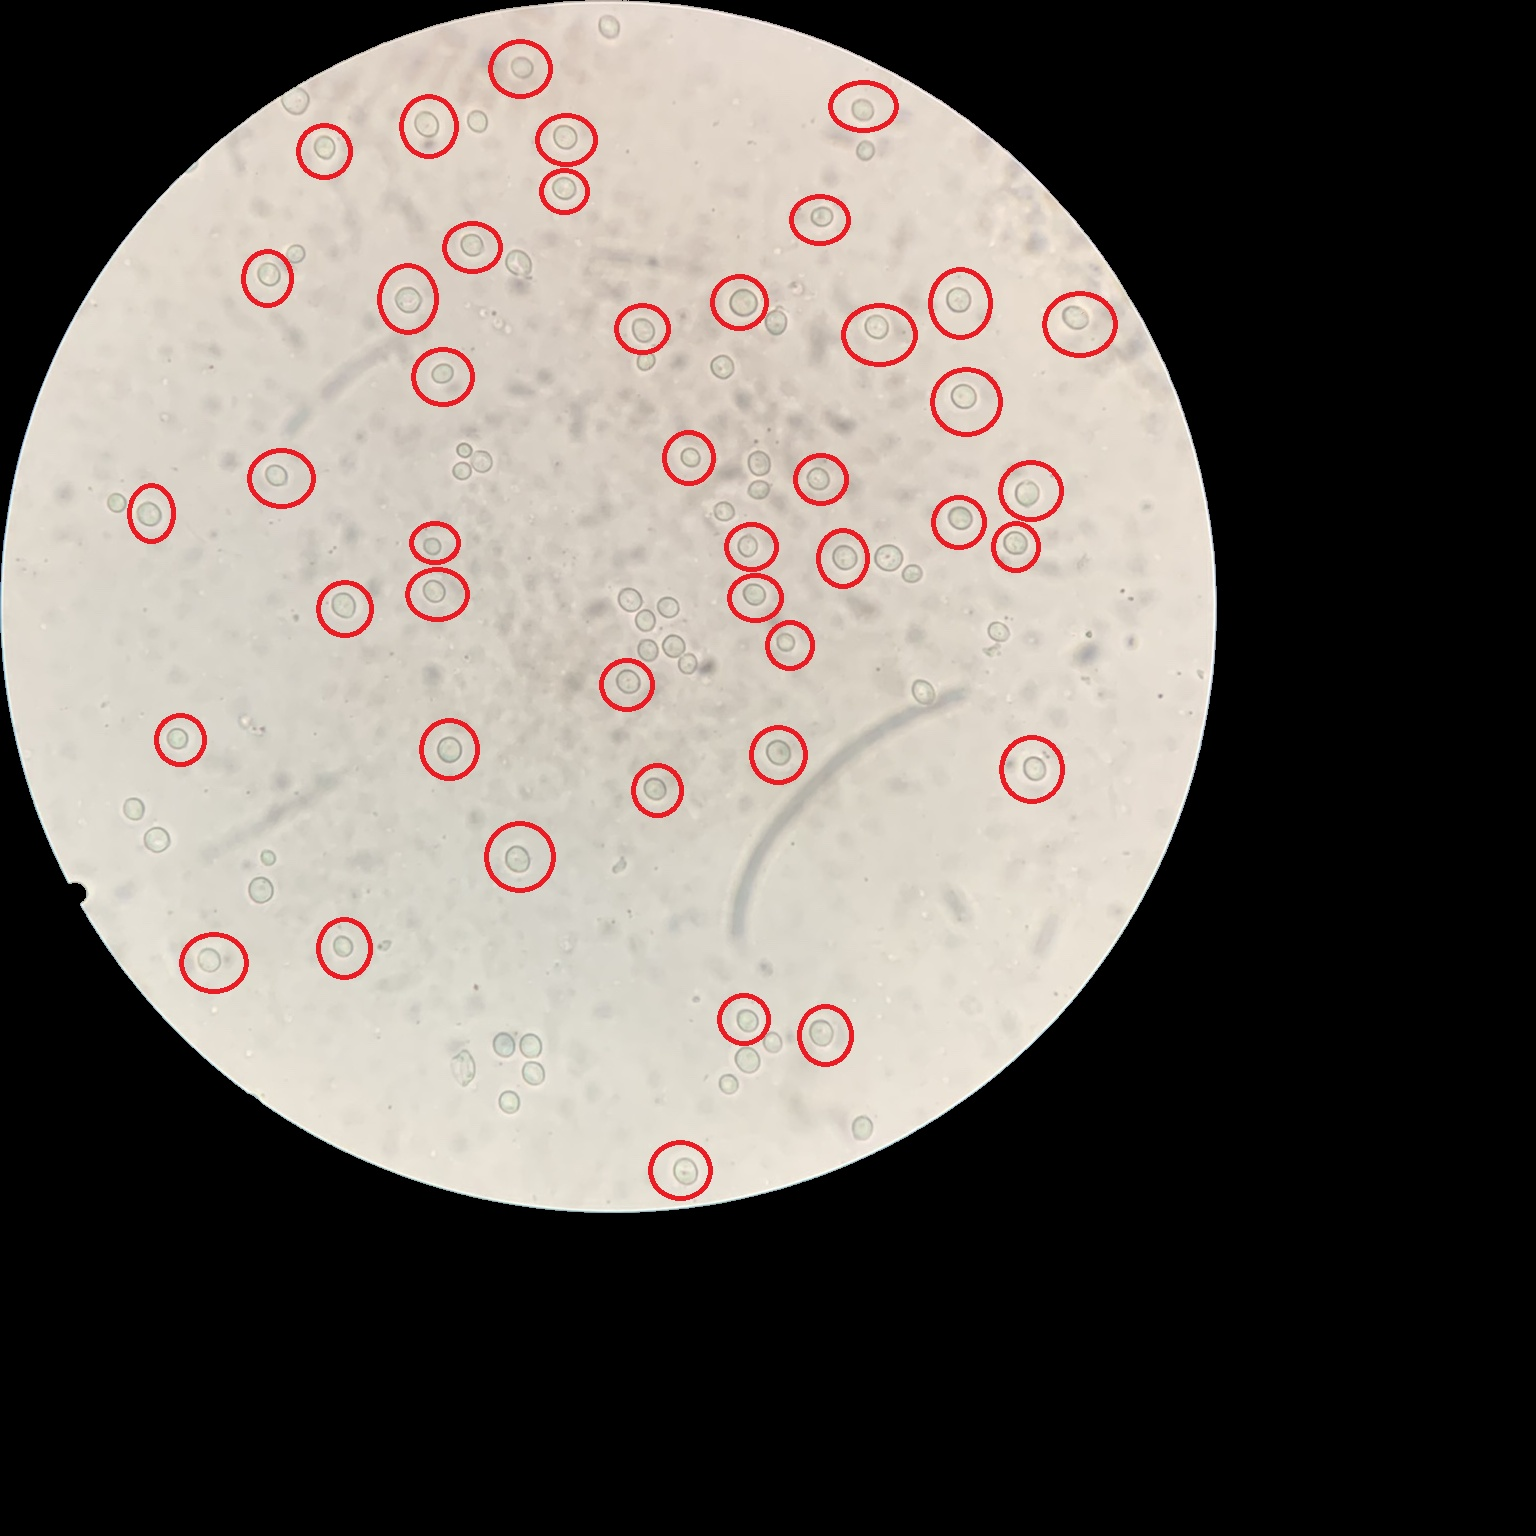

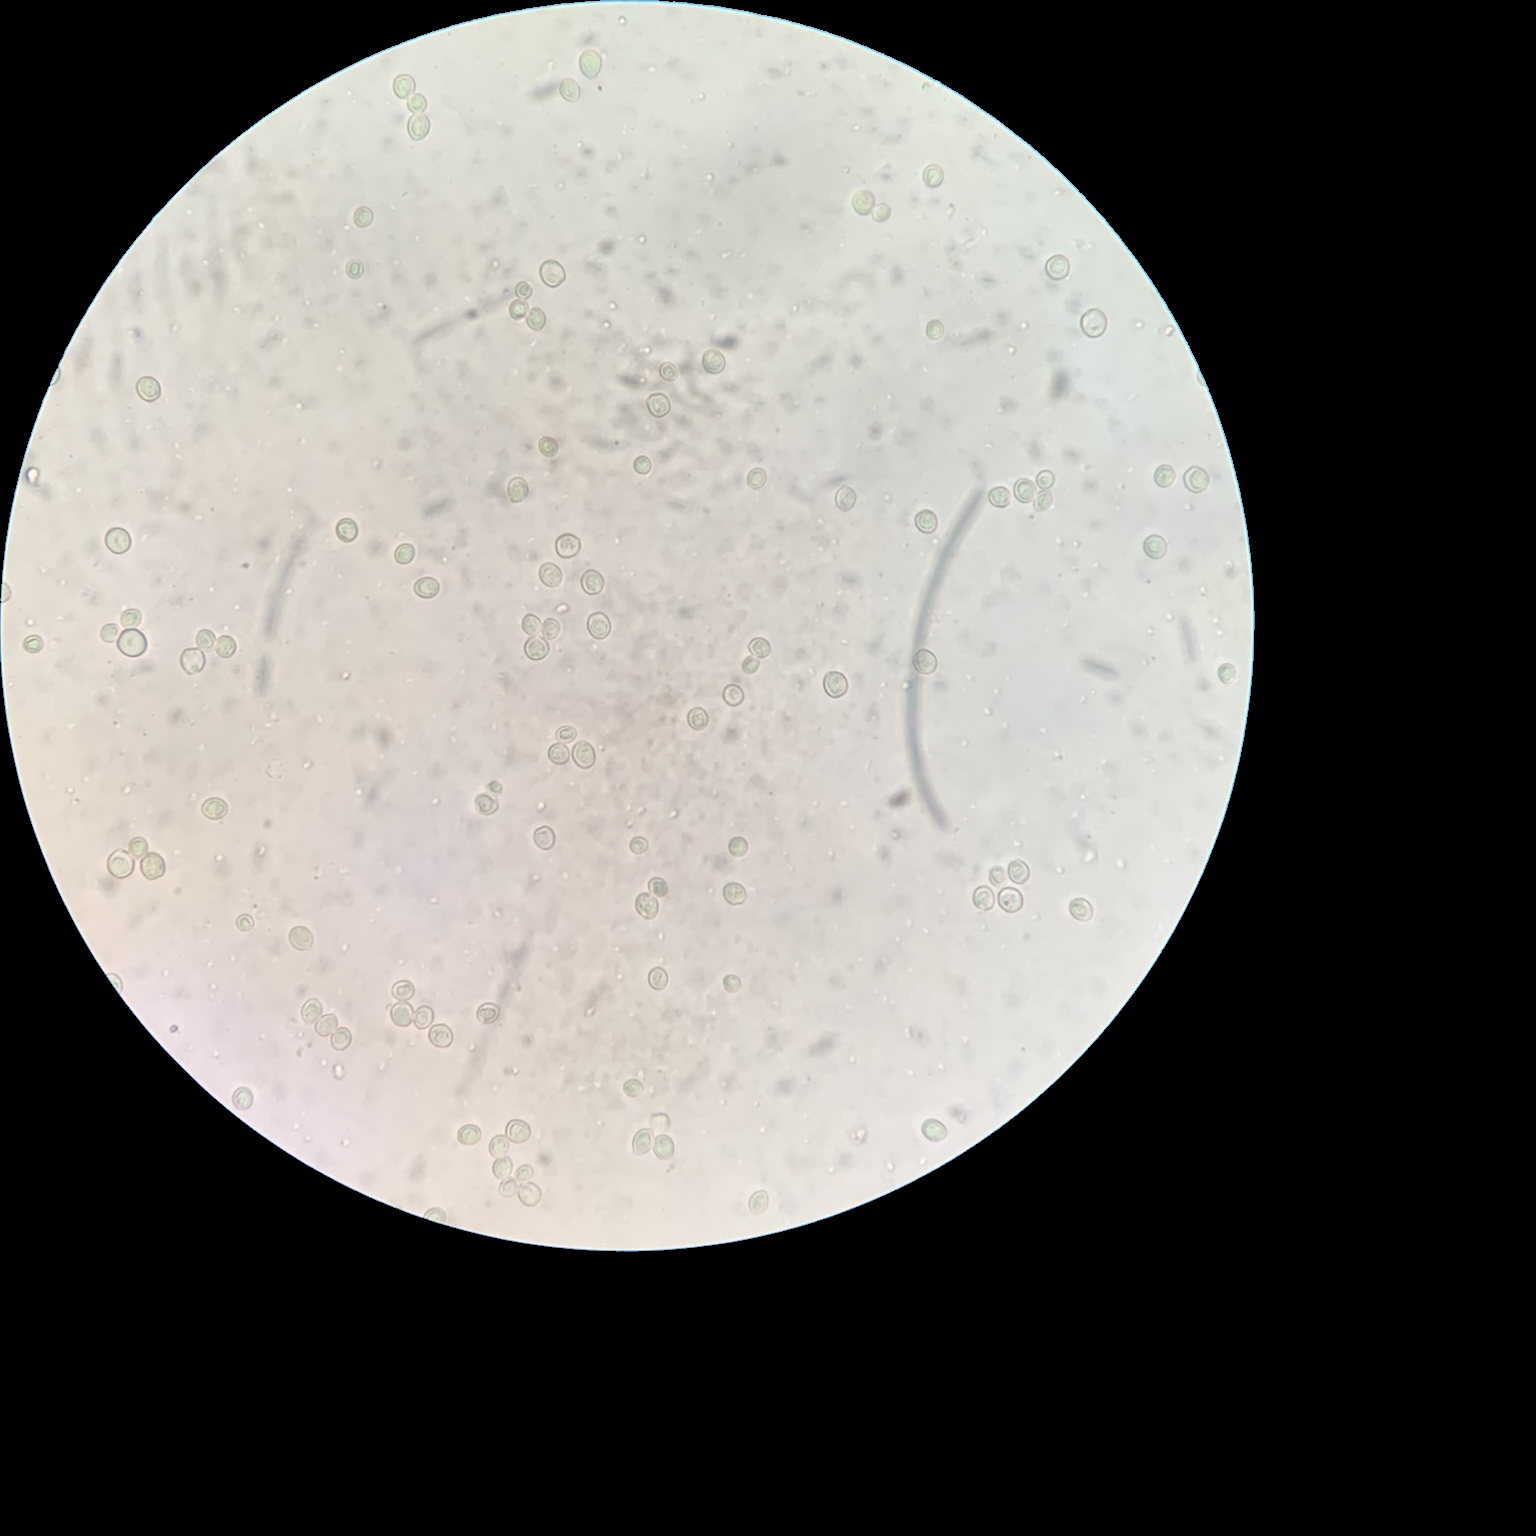

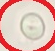

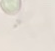

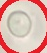

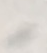

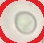

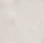

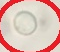

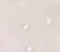

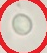

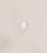

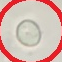

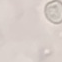

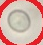

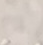

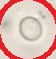

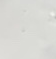

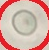

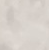

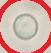

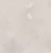

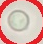

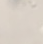

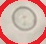

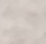

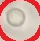

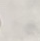

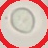

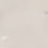

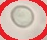

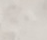

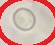

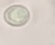

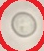

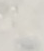

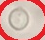

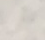

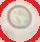

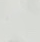

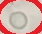

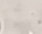

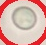

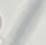

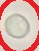

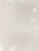

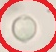

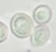

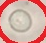

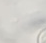

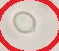

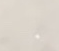

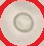

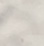

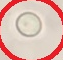

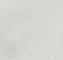

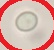

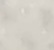

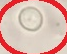

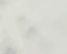

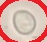

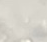

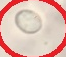

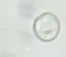

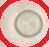

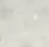

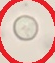

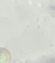

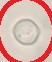

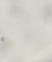

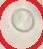

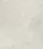

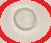

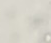

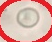

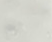

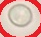

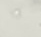

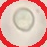

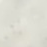

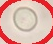

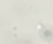

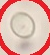

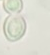

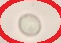

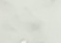

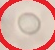

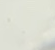

43


In [ ]:
img_test = cv2.imread('Tu_Lieu_AI_Cut_Outside/E1_B2_2H_11.jpeg')
unlabeled_img_test = cv2.imread('Tu_Lieu_AI_Goc_Cut_Outside/E1_B2_2H_11.jpeg')
cv2_imshow(img_test)
cv2_imshow(unlabeled_img_test)
gray_image = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
thresh_hold = 155
ret, thresholded_image = cv2.threshold(gray_image, thresh_hold, 255, cv2.THRESH_BINARY)
# thresholded_image = cv2.bitwise_not(thresholded_image
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
MAX_HEIGHT = img_test.shape[0] * 0.5
MIN_HEIGHT = img_test.shape[0] /150
dem =0
mark = []
for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if h < MAX_HEIGHT and h > MIN_HEIGHT:
          if (x+w//2, y+h//2) not in mark and is_ellipse(cnt, 0.5):
            # print(f"x={x+w//2} ----- y= { y+ h//2}")

            mark.append((x+w//2, y+h//2))
            mark.append((x+w//2+1, y+h//2))
            mark.append((x+w//2+1, y+h//2+1))
            mark.append((x+w//2-1, y+h//2-1))
            mark.append((x+w//2, y+h//2+1))
            mark.append((x+w//2, y+h//2-1))
            mark.append((x+w//2-1, y+h//2))
            dem +=1

            crop_image = img_test[y:y+h, x:x+w]
            crop_unlabeled_image = unlabeled_img_test[y:y+h, x:x+w]

            # if has_red_color(crop_image):
            #   classified_folder= "normal"
            # elif has_green_color(crop_image):
            #   classified_folder= "normal_2x"
            # elif has_purple_color(crop_image):
            #   classified_folder= "abnormal"
            # elif has_blue_color(crop_image):
            #   classified_folder= "abnormal_2x"

            # classified_path = "Classify_Labeled_Data/"+classified_folder+"/"+unlabeled_cut_outside_list[i].split('.')[0]+"="+str(dem)+".jpeg"
            # cv2.imwrite(classified_path, crop_unlabeled_image)
            cv2_imshow(crop_image)
            cv2_imshow(crop_unlabeled_image)
            print("=======")
print(dem)
